Alura
dataset: https://archive.ics.uci.edu/dataset/45/heart+disease
curso: https://cursos.alura.com.br/course/tensorflow-implementando-perceptron-multiplas-camadas
github do curso: https://github.com/alura-cursos/tensorflow

pandas 1.5.3
matplotlib 3.7.1
seaborn 0.13.1
tensorflow 2.15.0
numpy 1.23.5
sklearn 1.2.2


In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


 # Coleta de Dados (Data Collection)

In [2]:
from ucimlrepo import fetch_ucirepo
# 
doenca_cardiaca = fetch_ucirepo(id=45)
print('Variáveis disponíveis no dataset de doenças cardíacas da UCI:')
doenca_cardiaca.variables   # exibe as variaveis do dataset importado

Variáveis disponíveis no dataset de doenças cardíacas da UCI:


,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


# Exploração de Dados (Data Exploration)

In [3]:
X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]
X.head()

,age,chol,cp
0,63,233,1
1,67,286,4
2,67,229,4
3,37,250,3
4,41,204,2


In [4]:
target = doenca_cardiaca.data.targets
target.head()

,num
0,0
1,2
2,1
3,0
4,0


In [8]:
target['num'].unique()

array([0, 2, 1, 3, 4])

# Preparação dos Dados

In [11]:
def tem_doenca(target):
    # valores acima de 0, é que tem doença
    return target > 0
target = tem_doenca(target) * 1
target.head()

,num
0,0
1,1
2,1
3,0
4,0


In [12]:
df = X.copy()
df['y'] = target
df.head()

,age,chol,cp,y
0,63,233,1,0
1,67,286,4,1
2,67,229,4,1
3,37,250,3,0
4,41,204,2,0


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


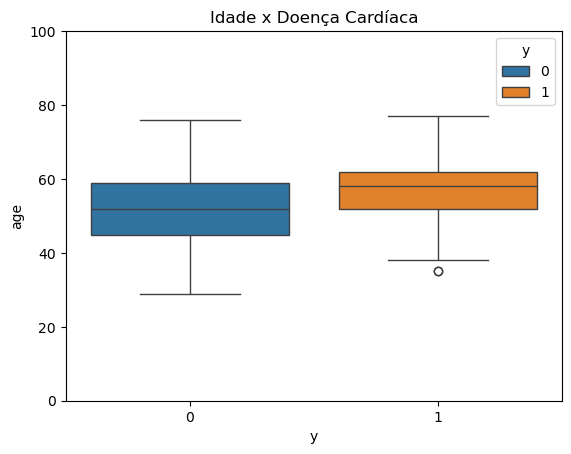

In [15]:
sns.boxplot(x='y', y='age', hue='y', data=df)
plt.title('Idade x Doença Cardíaca')
plt.ylim(0, 100)
plt.show()

esta linha no meio, é a mediana, veja que elas são diferentes

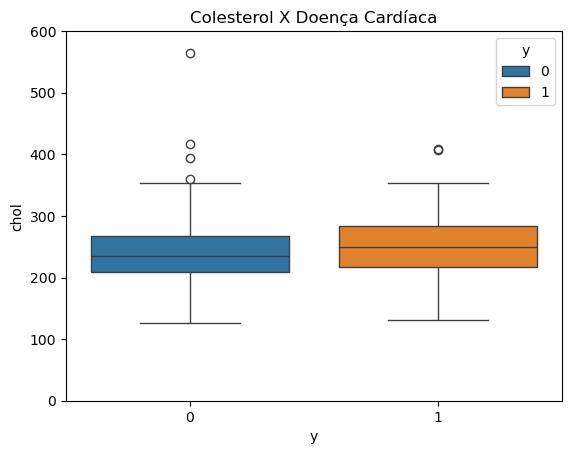

In [16]:
sns.boxplot(x='y', y='chol', hue='y', data=df)
plt.title('Colesterol X Doença Cardíaca')
plt.ylim(0, 600)
plt.show()

 # Análise de Correlação

In [17]:
# temos que tentar observar se existe correlação entre y/targete que ter ou não doença cardíaca
# relativo as variaveis como coleterol, idade e outros
df[['age', 'chol', 'y']].corr # exibe a correlação entre as colunas

<bound method DataFrame.corr of      age  chol  y
0     63   233  0
1     67   286  1
2     67   229  1
3     37   250  0
4     41   204  0
..   ...   ... ..
298   45   264  1
299   68   193  1
300   57   131  1
301   57   236  1
302   38   175  0

[303 rows x 3 columns]>

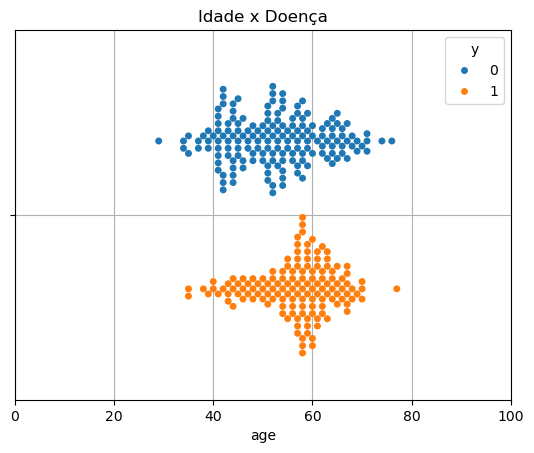

In [18]:
sns.swarmplot(data=df, x='age', hue='y', dodge=True)
plt.title('Idade x Doença')
plt.xlim(0,100)
plt.grid()
plt.show()


Neste código, atribuímos uma cor diferente a cada categoria da variável 'y' no gráfico com o parâmetro hue. Além disso, quando definimos o parâmetro dodge=True, separamos os pontos no gráfico por categoria da variável hue, o que facilita a visualização e compreensão das diferenças entre as categorias. No contexto deste gráfico, significa que os dados referentes a pacientes com e sem doença cardíaca serão levemente deslocados um do outro no eixo X, evitando sobreposição e tornando mais clara a distribuição de cada grupo.

No gráfico swarmplot obtido, podemos notar que a distribuição da idade entre os dois grupos (presença ou ausência de doença cardíaca) mostra que os indivíduos sem doença cardíaca (pontos azuis) estão majoritariamente concentrados nas idades mais jovens. Já os indivíduos com doença cardíaca (pontos laranjas) parecem estar mais distribuídos, mas com uma concentração em uma faixa etária próxima dos 60 anos de idade.

In [19]:
X['cp'].unique()

array([1, 4, 3, 2])

# Exploração de Dados
não é interessante trabalhar com categorias com sequencia numerica, pois pode "confundir" a ML
vamos converter para matriz de 0 e 1, criando uma coluna para cada valor 

In [21]:
import pandas as pd

df_cp = pd.get_dummies(X['cp'], prefix='cp')
df_cp.head()

,cp_1,cp_2,cp_3,cp_4
0,True,False,False,False
1,False,False,False,True
2,False,False,False,True
3,False,False,True,False
4,False,True,False,False


# Limpeza de Dados (Data Cleaning)
# Tratamento de Variáveis Categóricas
agora vamos substituir coluna X['cp'] pela nova matriz df_cp

In [22]:
# axis se refere ao exixo, 1 é igual a coluna
X = X.drop('cp', axis=1)
X = X.join(df_cp)
X.head()

,age,chol,cp_1,cp_2,cp_3,cp_4
0,63,233,True,False,False,False
1,67,286,False,False,False,True
2,67,229,False,False,False,True
3,37,250,False,False,True,False
4,41,204,False,True,False,False
